In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

## Model definition

In [2]:
model, solver = load_POMDP_file(file_name='./Example Models/4x3.95-no_loop_2.POMDP')

In [3]:
model.convert_to_grid([
    ['s0', 's1', 's2', 's3'],
    ['s4', None, 's5', 's6'],
    ['s7', 's8', 's9', 's10']
    ])

In [4]:
model.end_states = [3,6]

## Solving

In [5]:
solver.eps = 10e-4

In [6]:
vf, history = solver.solve(model, 10,10)

Backups 0: 100%|██████████| 10/10 [00:00<00:00, 178.79it/s]


Expansions:  80%|████████  | 8/10 [00:18<00:04,  2.35s/it]

Converged early...


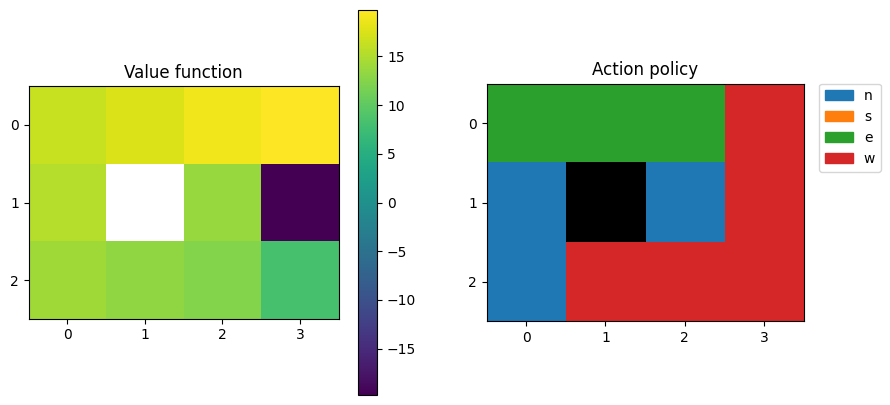

In [7]:
vf.plot()

## Checking for better pruning

In [8]:
len(vf)

39

In [9]:
pruned_vf = vf.prune(level=4)

[ 13.37247582  13.48434689  14.45965922  19.76933396  13.40178752
  10.38194623 -19.76933396  13.28087487  11.70871473  11.69694326
 -14.08432101]
 -> Dominated

[ 15.80153753  17.66608174  18.89571517  19.76933396  13.10979218
 -13.25139667 -19.76933396   8.31078872   7.62977382   7.99591116
   4.75860429]
 -> Dominated

[ 14.99699417  16.65564594  17.9698591   19.76933396  14.55362242
  13.39077362 -19.76933396  12.7953755    7.7580601    9.85038154
 -14.2929748 ]
 -> Dominated

[ 11.10308735  15.26041998  17.76758746  19.76933396  11.19968191
  13.55156516 -19.76933396  13.10470539  10.45639562  12.15323522
 -14.24068995]
 -> Dominated

[ 14.12136922  16.38718732  18.78835863  19.76933396  13.10979218
 -12.98326687 -19.76933396  10.4745225   11.17459803   8.26637788
   4.75860429]
 -> Dominated



In [10]:
len(pruned_vf)

34

## Agent simulation

In [11]:
a = Agent(model)
a.value_function = vf

In [12]:
sim_history = a.simulate()

  0%|          | 4/1000 [00:00<00:00, 1846.69it/s]

Simulation done:
	- Runtime (s): 0.005177
	- Steps: 6
	- Total rewards: 0.84
	- End state: s3


In [13]:
sim_history.save_simulation_video()

Video saved at 'Sim Videos/s11-a4-20230913_024236.mp4'...


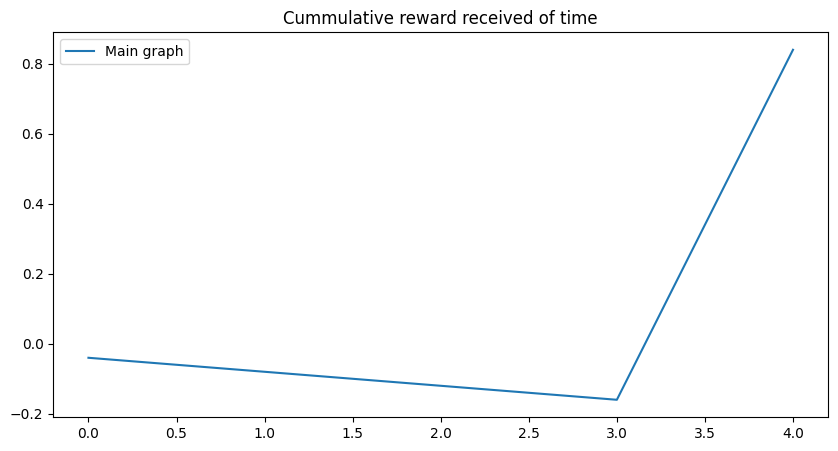

In [14]:
sim_history.rewards.plot('total')

In [15]:
rewards = a.run_n_simulations()

100%|██████████| 1000/1000 [00:01<00:00, 642.60it/s]

All 1000 simulations done:
	- Average runtime (s): 0.0015561910000000002
	- Average step count: 7.379
	- Average total rewards: 0.6628399999999979


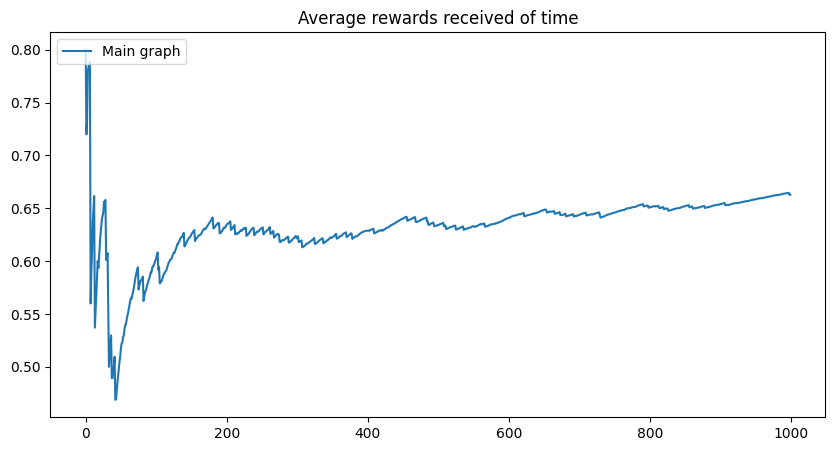

In [16]:
rewards.plot('ma')